<a href="https://colab.research.google.com/github/JessicaIsabelle/Bootcamp-Data-Analytics-Womakers-Code/blob/main/Filmes_Holywood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequência e Medidas com Python - Filmes Holywood**

Importando bibliotecas

In [62]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

Os dados utilizado nesse script foram baixados do kaggle no link: https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies


Esse dataset contém informações sobre os 1000 filmes de Holywood com maior bilheteria, e o dicionário das variáveis está abaixo:

*   ***Title*** - título do filme
*   ***Movie Info*** - descrição do filme
*   ***Distributor*** - distribuidora do filme
*   ***Release Date*** - data de lançamento
*   ***Domestic Sales*** - quantidade de bilheteria vendida nacionalmente
*   ***International Sales*** - quantidade de bilheteria vendida internacionalmente
*   ***World Sales*** - quantidade de bilheteria vendida mundialmente
*   ***Genre*** - gênero do filme
*   ***Movie Runtime*** - duração do filme
*   ***License*** - licença do filme


Importando os dados que estão em .csv

In [3]:
data = pd.read_csv("Highest Holywood Grossing Movies.csv")

## **Qual o seu tipo de dado?**

In [4]:
# verificando as primeiras colunas da base de dados
data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [5]:
#Quantidade de linhas e colunas presentes na base:
data.shape

(918, 11)

In [6]:
# Excluindo coluna "Unnamed: 0" pois é desnecessária
data.drop(columns=['Unnamed: 0'])

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [7]:
# Colunas que restaram
data.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [8]:
# Verificando o tipo das colunas
data.dtypes

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [9]:
# Mudando a coluna "Movie Runtime" para valores numéricos de hora: 
runtime = data['Movie Runtime'].str.split(expand=True).iloc[:,[0,2]]
runtime[2].fillna(0, inplace=True)   #colocando 0 nos valores nulos de segundos
runtime = runtime.astype('int64')    #convertendo para número
runtime['hour'] = runtime[0] + runtime[2]/60
data['Movie Runtime'] = runtime['hour']

In [10]:
# verificando o resultado
data['Movie Runtime']

0      2.300000
1      3.016667
2      2.700000
3      2.233333
4      2.483333
         ...   
913    2.050000
914    1.366667
915    2.216667
916    1.633333
917    1.700000
Name: Movie Runtime, Length: 918, dtype: float64

In [11]:
# Mudando o tipo da variável Release Date para Datetime
data['Release Date'] = pd.to_datetime( data['Release Date'])

In [12]:
# Transformando o valor arrecadado pra milhões de dólares para melhor visualização dos valores
data[['Domestic Sales (in $)','International Sales (in $)','World Sales (in $)']]= data[['Domestic Sales (in $)',
                                            'International Sales (in $)','World Sales (in $)']].apply(lambda x: x/(10**6))

In [13]:
# Verificando essas colunas
data[['Domestic Sales (in $)','International Sales (in $)','World Sales (in $)']].head()

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,936.662225,1132.859475,2069.521700
1,858.373000,1939.128328,2797.501328
2,760.507625,2086.738578,2847.246203
3,700.426566,647.171407,1347.597973
4,678.815482,1369.544272,2048.359754


In [14]:
# verificando novamente o tipo das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  918 non-null    int64         
 1   Title                       918 non-null    object        
 2   Movie Info                  918 non-null    object        
 3   Distributor                 918 non-null    object        
 4   Release Date                800 non-null    datetime64[ns]
 5   Domestic Sales (in $)       918 non-null    float64       
 6   International Sales (in $)  918 non-null    float64       
 7   World Sales (in $)          918 non-null    float64       
 8   Genre                       918 non-null    object        
 9   Movie Runtime               918 non-null    float64       
 10  License                     744 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memo

As variáveis qualitativas na base de dados são: 'Title', 'Movie Info', 'Distributor', 'Genre', 'License'.



As variáveis quantitativas na base de dados são: 
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Movie Runtime'

## **Distribuição de frequência**

### **Variáveis Qualitativas**

Vamos verificar quantos filmes de cada distribuidora estão na base de dados.

In [82]:
# vamos fazer uma tabela de frequência
distribuidor=pd.crosstab(index = data["Distributor"], columns="Qtd_filmes").sort_values('Qtd_filmes', ascending = False)
distribuidor

col_0,Qtd_filmes
Distributor,
Warner Bros.,158
Walt Disney Studios Motion Pictures,155
Universal Pictures,119
Twentieth Century Fox,117
Sony Pictures Entertainment (SPE),101
Paramount Pictures,99
New Line Cinema,21
DreamWorks,21
Lionsgate,19


In [78]:
distribuidor.shape

(34, 1)

In [84]:
qtd_filmes=distribuidor['Qtd_filmes'].sum()
qtd_filmes

918

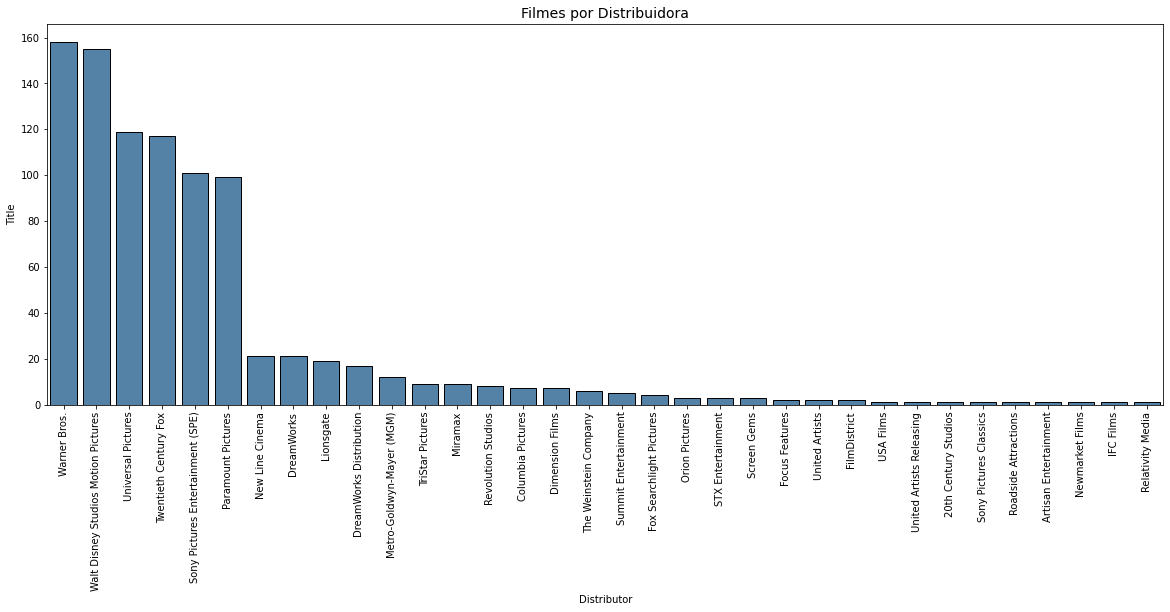

In [17]:
# vamos fazer um gráfico de barras
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(x='Distributor', y='Title', color = "steelblue", edgecolor='black',
            data= data.groupby('Distributor', as_index=False)['Title'].count().sort_values('Title',ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Filmes por Distribuidora', fontsize=14)
plt.show()

### **Variáveis Quantitativas**

Verificando a distribuição de tempo do filme.

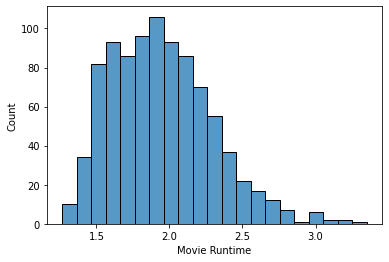

In [18]:
# com a quantidade de bins default
sns.histplot(data = data, x = "Movie Runtime")
plt.show()

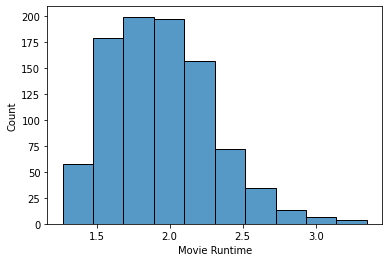

In [19]:
# com a quantidade de bins escolhida
sns.histplot(data = data, x = "Movie Runtime", bins = 10)
plt.show()

## **Medidas de tendência central e Medidas separatrizes**

### **Variáveis Quantitativas**

In [20]:
# Verificando a "distribuição" de todas as variáveis numéricas da base de dados ao mesmo tempo
data.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,458.500000,167.746918,230.143436,396.866826,1.942847
std,265.148072,104.036045,217.601104,308.262916,0.347929
min,0.000000,80.360843,0.000260,81.600000,1.266667
25%,229.250000,101.607072,88.456200,200.556355,1.666667
50%,458.500000,132.135096,163.881928,301.941607,1.916667
75%,687.750000,191.390486,288.557651,475.071823,2.166667
max,917.000000,936.662225,2086.738578,2847.246203,3.350000


Agora iremos focar as análises nos dados de tempo de duração do filme.

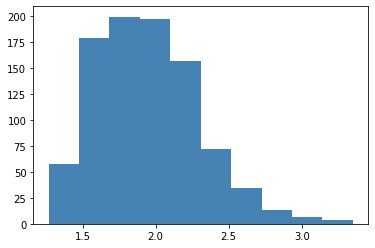

O que mais aparece:(1.6833333333333333,1.8916666666666666)
A moda:1.7875


In [22]:
# calculando a moda de variável quantitativa

# criando um histograma
n, bins, patches = plt.hist(data['Movie Runtime'], bins=10, color = "steelblue")  
plt.show()

mode_index = n.argmax()
print('O que mais aparece:(' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ')')         
print('A moda:'+ str((bins[mode_index] + bins[mode_index+1])/2))

In [ ]:
# calculando os quantis
data["Movie Runtime"].quantile([0.05, 0.95])

0.05    1.466667
0.95    2.566667
Name: Movie Runtime, dtype: float64

Verificando graficamente o tempo de duração dos filmes.

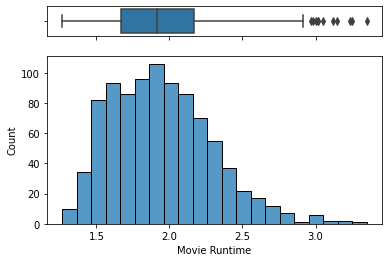

In [23]:
# creando uma figura de dois axes 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# adicionando um gráfico em cada ax 
sns.boxplot(data["Movie Runtime"], ax=ax_box)
sns.histplot(data=data, x="Movie Runtime", ax=ax_hist)
 
# removendo o nome do eixo x do boxplot
ax_box.set(xlabel='')
plt.show()

### **Variáveis Qualitativas**

In [24]:
# calculando a moda de variável qualitativa
statistics.mode(data['Distributor'])

'Warner Bros.'

### **Variáveis Quantitativas VS Variáveis Qualitativas**

Vamos verificar quanto cada distribuidora arrecadou.

In [85]:
# quanto cada distribuidora arrecadou em média
mean_arrecadation_distributor=data.groupby(['Distributor'])['World Sales (in $)'].mean().reset_index(name="Média Arrecadação")
mean_arrecadation_distributor_=mean_arrecadation_distributor.sort_values(by='Média Arrecadação',ascending=False)
mean_arrecadation_distributor_

,Distributor,Média Arrecadação
14,Newmarket Films,612.054506
24,Summit Entertainment,545.831897
32,Walt Disney Studios Motion Pictures,531.432894
4,DreamWorks,495.855995
27,Twentieth Century Fox,415.289694
33,Warner Bros.,402.515784
10,Lionsgate,394.658207
31,Universal Pictures,383.215503
23,Sony Pictures Entertainment (SPE),370.856318
9,IFC Films,368.744044


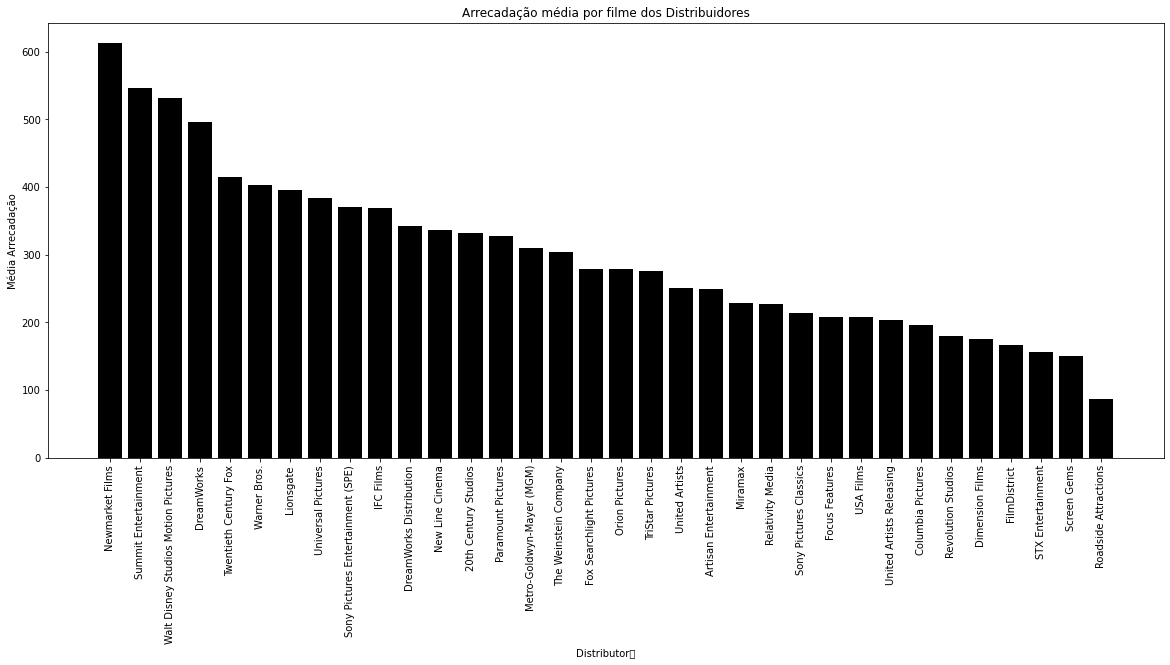

In [72]:
plt.figure(figsize=(20,8))#Tamanho da figura 
plt.bar(mean_arrecadation_distributor_['Distributor'],mean_arrecadation_distributor_['Média Arrecadação'],color='black')
plt.title('Arrecadação média por filme dos Distribuidores') # Titulo 
plt.xlabel('Distributor	') # Eixo x 
plt.ylabel('Média Arrecadação') # Eixo y 
plt.xticks(rotation=90)# Rotação em 90 Graus 
plt.show()

In [73]:
# quanto cada distribuidora arrecadou no total
total_arrecadation=data.groupby(['Distributor'])['World Sales (in $)'].sum().reset_index(name="Total Arrecadação").sort_values(by='Total Arrecadação',ascending=False)
total_arrecadation.head()

,Distributor,Total Arrecadação
32,Walt Disney Studios Motion Pictures,82372.098598
33,Warner Bros.,63597.493931
27,Twentieth Century Fox,48588.894179
31,Universal Pictures,45602.644818
23,Sony Pictures Entertainment (SPE),37456.488081


In [80]:
total=total_arrecadation.sum()
total

Distributor          Walt Disney Studios Motion PicturesWarner Bros...
Total Arrecadação                                        364323.746068
dtype: object

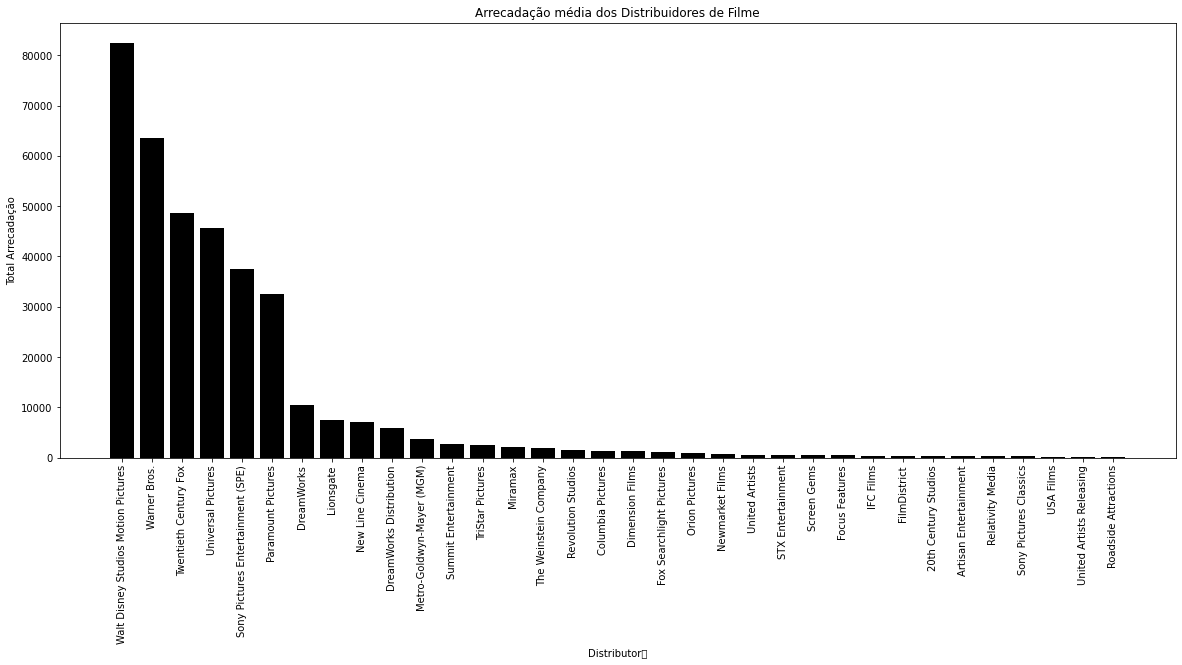

In [74]:
plt.figure(figsize=(20,8))#Tamanho da figura 
plt.bar(total_arrecadation['Distributor'],total_arrecadation['Total Arrecadação'],color='black')
plt.title('Arrecadação média dos Distribuidores de Filme') # Titulo 
plt.xlabel('Distributor	') # Eixo x 
plt.ylabel('Total Arrecadação') # Eixo y 
plt.xticks(rotation=90)# Rotação em 90 Graus 
plt.show()

## **Medidas de dispersão**

Verificando as medidas de disperção para o tempo de duração dos filmes.

In [27]:
# variância
data["Movie Runtime"].var()

0.12105443402504765

In [28]:
# desvio padrão
data["Movie Runtime"].std()

0.3479287772304091

In [29]:
# desvio médio absoluto
data["Movie Runtime"].mad()

0.27727393547590895

Vamos verificar a relação entre o valor arrecadado nacionalmente e internacionalmente.

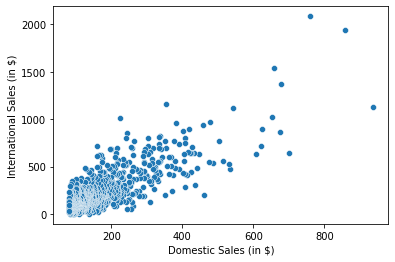

In [ ]:
sns.scatterplot(data = data, x = 'Domestic Sales (in $)', y ='International Sales (in $)')
plt.show()

**CONCLUSÃO:**
- Na base temos 34 distribuidores que arrecadaram juntos 364 bilhões de dólares com o lançamento de 918 filmes.
- Walt Disney, Warner Bros e Twentieth foram os 3 distribuidores que mais arrecadaram, juntos conseguiram 194 bilhões de dólares (53% do total) com 430 filmes lançados.
- Já na visão de arrecadação média por filme, os distribuidores com maior retorno são Newmarket Films (612 milhões), Summit Entertainment	(545 milhões) e Walt Disney (531 milhões).